# Random Forests Using PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA

In [ ]:
# Load in the cleaned dataframe
df = pd.read_csv("./engineered_df_with_category_interactions.csv")
df.head(3)

,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,...,alco_1 active_0,alco_1 active_1,alco_1 BMI,alco_1 MAP,active_0 BMI,active_0 MAP,active_1 BMI,active_1 MAP,BMI MAP,cardio
0,18393.0,168.0,62.0,110.0,80.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,21.967,90.000,1977.030000,0
1,20228.0,156.0,85.0,140.0,90.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000,0.0,34.928,106.667,3725.664976,1
2,18857.0,165.0,64.0,130.0,70.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,23.508,90.0,0.000,0.000,2115.720000,1


In [ ]:
# Define features and target
X = df.drop("cardio", axis=1)
y = df['cardio']

In [ ]:
# Train test split on the data to have prediction results
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0,stratify=y)
X_train.head(3)

,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,...,alco_0 MAP,alco_1 active_0,alco_1 active_1,alco_1 BMI,alco_1 MAP,active_0 BMI,active_0 MAP,active_1 BMI,active_1 MAP,BMI MAP
17802,17532.0,154.0,70.0,180.0,110.0,1.0,0.0,1.0,0.0,0.0,...,133.333,0.0,0.0,0.0,0.0,0.000,0.000,29.516,133.333,3935.456828
26207,22219.0,160.0,60.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,93.333,0.0,0.0,0.0,0.0,23.437,93.333,0.000,0.000,2187.445521
15874,22741.0,174.0,69.0,125.0,80.0,0.0,1.0,1.0,0.0,0.0,...,95.000,0.0,0.0,0.0,0.0,0.000,0.000,22.790,95.000,2165.050000


### Random Forest Training w/o PCA

In [ ]:
# Try to optimize a random forest using up to 2000 estimators and max depth of 10 from last run (previous file)
B = np.arange(10,2000,50)
grid = {'n_estimators':B}

rf = RandomForestClassifier(max_depth=10)
rfCV = GridSearchCV(rf,param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(X_train, y_train.values.ravel()) # NOTE: .ravel() must be used to avoid an error

GridSearchCV(estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610,
       1660, 1710, 1760, 1810, 1860, 1910, 1960])},
             return_train_score=True)

In [ ]:
# Best number of trees
rfCV.best_params_

{'n_estimators': 210}

In [ ]:
# Best validation accuracy from 210 trees
rfCV.best_score_

0.7356509015620235

<Axes: xlabel='trees'>

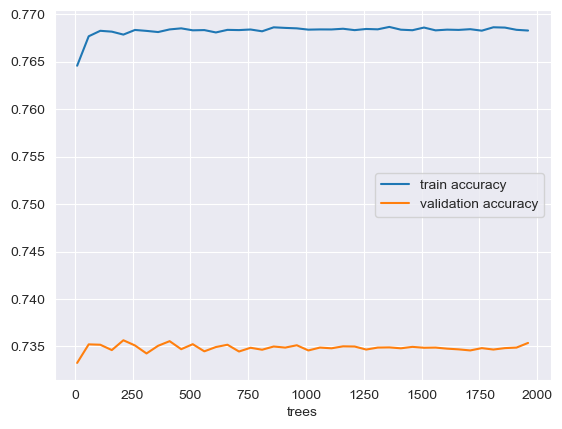

In [ ]:
# Plot results
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train accuracy'] = rfCV.cv_results_['mean_train_score']
results['validation accuracy'] = rfCV.cv_results_['mean_test_score']

results.plot.line(x='trees', y=['train accuracy', 'validation accuracy'])

In [ ]:
# Testing Accuracy
series = pd.Series(rfCV.cv_results_['mean_test_score'])
idx = series.idxmax()
print('Training accuracy', rfCV.cv_results_['mean_train_score'][idx].round(3))
print('Validation accuracy', rfCV.cv_results_['mean_test_score'][idx].round(3))

Training accuracy 0.768
Validation accuracy 0.736


In [ ]:
# Score the test sets
print('Testing accuracy', rfCV.score(X_test, y_test).round(3))

Testing accuracy 0.732


In [ ]:
# OOB score for 210 decision trees
rf = RandomForestClassifier(n_estimators=210,max_depth=10,oob_score=True)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=210, oob_score=True)

In [ ]:
rf.oob_score_

0.735443966084488

In [ ]:
rf.score(X_test, y_test)

0.7313129793953979

In [ ]:
# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

ap_hi ap_lo              0.059374
ap_hi                    0.051727
ap_hi alco_0             0.049963
ap_hi smoke_0            0.048097
age ap_hi                0.043676
                           ...   
cholesterol_3 smoke_1    0.000036
gluc_2 smoke_1           0.000035
cholesterol_2 smoke_1    0.000035
cholesterol_3 gluc_2     0.000034
gluc_3 alco_1            0.000031
Length: 217, dtype: float64

<Axes: >

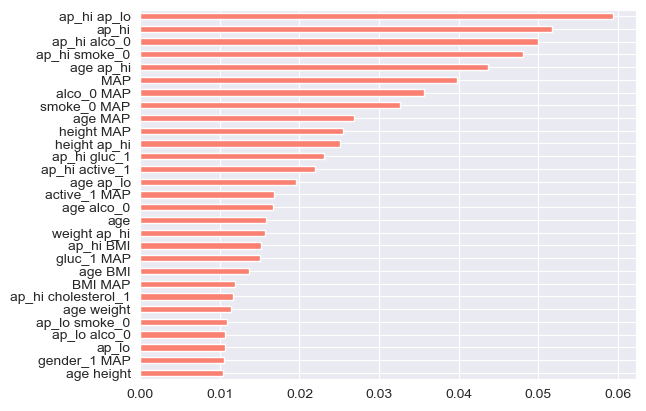

In [ ]:
feature_importances.loc[lambda x : x > 0.01].sort_values().plot.barh(color='salmon')

##### With the newly engineered feature set, the important features stay relatively the same; however, MAP is now introduced but that still makes sense since it is a combination of ap_hi and ap_lo.

#### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# def provided by https://towardsdatascience.com/comprehensive-tutorial-on-using-confusion-matrix-in-classification-92be4d70ea18
def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax, cmap='PuRd')
    plt.grid(False)

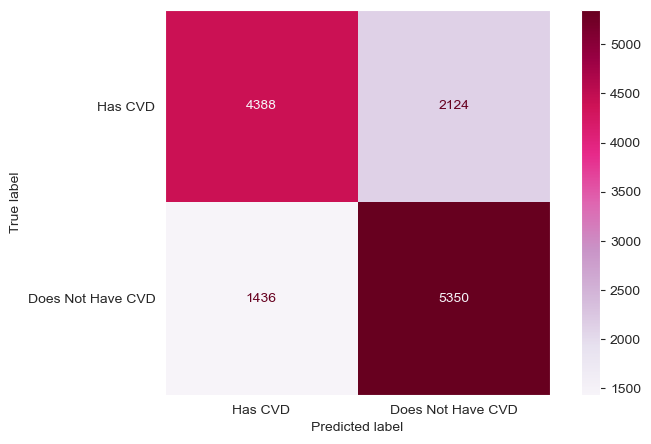

In [ ]:
# Generate the testing confusing matrix
yh = rfCV.best_estimator_.predict(X_test)
custom_confusion_matrix(
    y_test, yh,
    display_labels=["Has CVD", "Does Not Have CVD"]
)

##### This confusion matrix demonstrates that we are getting a decent amount of false negatives, which does not bode well. Though we are getting a majority True Positives and True Negatives which makes the accuracy makes sense.

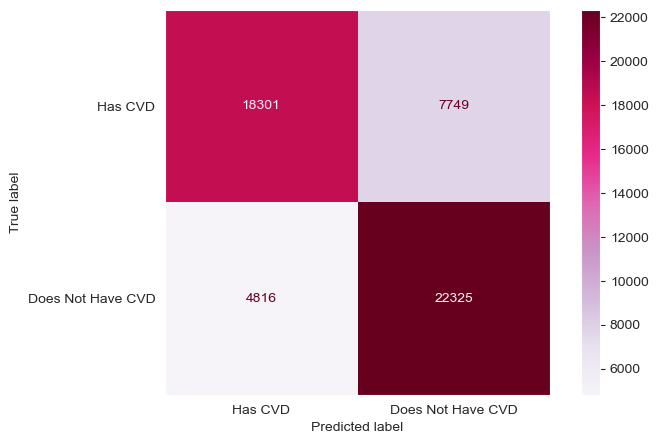

In [ ]:
# Just to see, lets see the training confusion matrix
yh2 = rfCV.best_estimator_.predict(X_train)
custom_confusion_matrix(
    y_train, yh2,
    display_labels=["Has CVD", "Does Not Have CVD"]
)

##### We are getting quite a lot of false negatives in this one too, though it is relatively proportional to the last confusion matrix

In [ ]:
# Visually compare the two dataframes: prediction and original test to see why false positives and negatives are happening
yh = pd.DataFrame(yh, columns=['cardio'])
df1 = pd.concat([X_test,y_test],axis=1)
X_temp = X_test.reset_index(drop=True)
df2 = pd.concat([X_temp, yh], axis=1)
df1.reset_index(drop=True, inplace=True)
df1.compare(df2, align_axis=0)

cardio
3     self      1.0
      other     0.0
4     self      1.0
      other     0.0
18    self      1.0
...             ...
13290 other     1.0
13293 self      1.0
      other     0.0
13295 self      0.0
      other     1.0

[7120 rows x 1 columns]

In [ ]:
# Grab a cell that has a false negative
df1.loc[3].head(21)

age              20555.000
height             162.000
weight              83.000
ap_hi              120.000
ap_lo               80.000
gender_1             1.000
gender_2             0.000
cholesterol_1        1.000
cholesterol_2        0.000
cholesterol_3        0.000
gluc_1               0.000
gluc_2               0.000
gluc_3               1.000
smoke_0              1.000
smoke_1              0.000
alco_0               1.000
alco_1               0.000
active_0             0.000
active_1             1.000
BMI                 31.626
MAP                 93.333
Name: 3, dtype: float64

In [ ]:
# Grab a cell that has a false negative
df1.loc[4].head(21)

age              19776.000
height             168.000
weight              66.000
ap_hi              120.000
ap_lo               80.000
gender_1             0.000
gender_2             1.000
cholesterol_1        1.000
cholesterol_2        0.000
cholesterol_3        0.000
gluc_1               1.000
gluc_2               0.000
gluc_3               0.000
smoke_0              1.000
smoke_1              0.000
alco_0               1.000
alco_1               0.000
active_0             0.000
active_1             1.000
BMI                 23.384
MAP                 93.333
Name: 4, dtype: float64

In [ ]:
# Grab a cell that has a false negative
df1.loc[18].head(21)

age              19860.000
height             163.000
weight              65.000
ap_hi              110.000
ap_lo               70.000
gender_1             1.000
gender_2             0.000
cholesterol_1        0.000
cholesterol_2        1.000
cholesterol_3        0.000
gluc_1               1.000
gluc_2               0.000
gluc_3               0.000
smoke_0              1.000
smoke_1              0.000
alco_0               1.000
alco_1               0.000
active_0             1.000
active_1             0.000
BMI                 24.465
MAP                 83.333
Name: 18, dtype: float64

In [ ]:
# Grab a cell that has a true positive
df1.loc[0].head(21)

age              19672.000
height             176.000
weight              92.000
ap_hi              160.000
ap_lo               90.000
gender_1             0.000
gender_2             1.000
cholesterol_1        1.000
cholesterol_2        0.000
cholesterol_3        0.000
gluc_1               1.000
gluc_2               0.000
gluc_3               0.000
smoke_0              1.000
smoke_1              0.000
alco_0               1.000
alco_1               0.000
active_0             0.000
active_1             1.000
BMI                 29.700
MAP                113.333
Name: 0, dtype: float64

In [ ]:
# Grab a cell that has a false positive
df1.loc[25].head(21)

age              19588.000
height             162.000
weight              99.000
ap_hi              140.000
ap_lo               90.000
gender_1             1.000
gender_2             0.000
cholesterol_1        1.000
cholesterol_2        0.000
cholesterol_3        0.000
gluc_1               1.000
gluc_2               0.000
gluc_3               0.000
smoke_0              1.000
smoke_1              0.000
alco_0               1.000
alco_1               0.000
active_0             0.000
active_1             1.000
BMI                 37.723
MAP                106.667
Name: 25, dtype: float64

In [ ]:
# Grab a cell that has a false positive
df1.loc[49].head(21)

age              21283.000
height             172.000
weight              92.000
ap_hi              140.000
ap_lo               90.000
gender_1             0.000
gender_2             1.000
cholesterol_1        0.000
cholesterol_2        0.000
cholesterol_3        1.000
gluc_1               1.000
gluc_2               0.000
gluc_3               0.000
smoke_0              0.000
smoke_1              1.000
alco_0               0.000
alco_1               1.000
active_0             0.000
active_1             1.000
BMI                 31.098
MAP                106.667
Name: 49, dtype: float64

In [ ]:
df2.head(3)

,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,...,alco_1 active_0,alco_1 active_1,alco_1 BMI,alco_1 MAP,active_0 BMI,active_0 MAP,active_1 BMI,active_1 MAP,BMI MAP,cardio
0,19672.0,176.0,92.0,160.0,90.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,29.700,113.333,3365.9901,1
1,19570.0,156.0,78.0,140.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,32.051,100.000,3205.1000,1
2,15164.0,158.0,57.0,100.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22.833,80.0,0.000,0.000,1826.6400,0


##### Considering that ap_hi and ap_lo are our most impactful features, it makes sense as to how the false negative was predicted by the random forest. The false negative occurred when an individual had a normal but almost high blood pressure, which may have caused the classifier to predict negative. The false positive occurred when an individual had a higher than normal blood pressure, which may have caused the classifier to predict positive.

### Random Forest Training with PCA

In [ ]:
# Load in standardized dataset for PCA
df2 = pd.read_csv("./std-engineered_df_with_category_interactions.csv")
df2.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,smoke_0 active_1,smoke_1 alco_0,smoke_1 alco_1,smoke_1 active_0,smoke_1 active_1,alco_0 active_0,alco_0 active_1,alco_1 active_0,alco_1 active_1,cardio
0,-0.433788,0.488110,-0.888124,-0.992845,-0.124219,-1.112179,-0.569948,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.309455,-1.100511,0.969301,0.825095,0.941111,1.707131,0.952717,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.245851,0.090955,-0.726609,0.219115,-1.189548,-0.776977,-0.569948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [ ]:
# Assign features
X = df2.drop('cardio',axis=1)
y = df2.cardio

In [ ]:
# Perform PCA
pca = PCA(n_components=len(X.columns))
pca.fit(X)

PCA(n_components=217)

In [ ]:
# Create PCA Columns
cols = ['PC-'+str(i+1) for i in range(pca.n_components_)]
cols

['PC-1',
 'PC-2',
 'PC-3',
 'PC-4',
 'PC-5',
 'PC-6',
 'PC-7',
 'PC-8',
 'PC-9',
 'PC-10',
 'PC-11',
 'PC-12',
 'PC-13',
 'PC-14',
 'PC-15',
 'PC-16',
 'PC-17',
 'PC-18',
 'PC-19',
 'PC-20',
 'PC-21',
 'PC-22',
 'PC-23',
 'PC-24',
 'PC-25',
 'PC-26',
 'PC-27',
 'PC-28',
 'PC-29',
 'PC-30',
 'PC-31',
 'PC-32',
 'PC-33',
 'PC-34',
 'PC-35',
 'PC-36',
 'PC-37',
 'PC-38',
 'PC-39',
 'PC-40',
 'PC-41',
 'PC-42',
 'PC-43',
 'PC-44',
 'PC-45',
 'PC-46',
 'PC-47',
 'PC-48',
 'PC-49',
 'PC-50',
 'PC-51',
 'PC-52',
 'PC-53',
 'PC-54',
 'PC-55',
 'PC-56',
 'PC-57',
 'PC-58',
 'PC-59',
 'PC-60',
 'PC-61',
 'PC-62',
 'PC-63',
 'PC-64',
 'PC-65',
 'PC-66',
 'PC-67',
 'PC-68',
 'PC-69',
 'PC-70',
 'PC-71',
 'PC-72',
 'PC-73',
 'PC-74',
 'PC-75',
 'PC-76',
 'PC-77',
 'PC-78',
 'PC-79',
 'PC-80',
 'PC-81',
 'PC-82',
 'PC-83',
 'PC-84',
 'PC-85',
 'PC-86',
 'PC-87',
 'PC-88',
 'PC-89',
 'PC-90',
 'PC-91',
 'PC-92',
 'PC-93',
 'PC-94',
 'PC-95',
 'PC-96',
 'PC-97',
 'PC-98',
 'PC-99',
 'PC-100',
 'PC-101

In [ ]:
#Proportion Variance Explained
PVE = pca.explained_variance_ratio_
PVE = pd.Series(PVE,index=cols)
PVE

PC-1      2.175252e-01
PC-2      1.069804e-01
PC-3      9.263243e-02
PC-4      8.508010e-02
PC-5      6.276021e-02
              ...     
PC-213    1.599832e-33
PC-214    1.599832e-33
PC-215    8.481973e-34
PC-216    1.364172e-34
PC-217    1.130982e-34
Length: 217, dtype: float64

In [ ]:
# Account for 95% variance
k = 0
total = PVE[k]
while k < len(PVE) and total < 0.95:
    k += 1
    total += PVE[k]

k += 1 # Must add 1 to account for 1-based indexing of PC labels
print('total variance accounted for ', total)

total variance accounted for  0.9504208327861752


<Axes: title={'center': 'PVE'}>

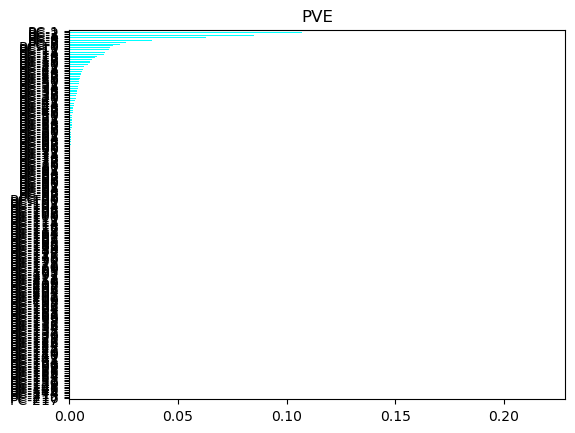

In [ ]:
PVE.sort_values().plot.barh(color='cyan', title='PVE')

In [ ]:
loadings = pca.components_
loadings = pd.DataFrame(loadings,index=cols,columns=X.columns)
loadings.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,smoke_0 active_0,smoke_0 active_1,smoke_1 alco_0,smoke_1 alco_1,smoke_1 active_0,smoke_1 active_1,alco_0 active_0,alco_0 active_1,alco_1 active_0,alco_1 active_1
PC-1,0.070100,0.004930,0.134382,0.210869,0.208838,0.135204,0.225365,-0.007673,0.007673,-0.023048,...,0.000259,-0.001830,0.000966,0.000605,0.000414,0.001157,0.000323,-0.002236,0.00035,0.001562
PC-2,0.025466,-0.035410,-0.273698,0.102549,0.110207,-0.261410,0.114541,0.004127,-0.004127,0.004637,...,-0.001506,0.002872,-0.001211,-0.000155,-0.000606,-0.000760,-0.001592,0.003442,-0.00052,-0.001330
PC-3,0.030748,-0.314444,-0.070264,-0.008018,-0.027516,0.103865,-0.019760,0.100845,-0.100845,-0.014155,...,0.000227,0.019951,-0.014063,-0.006115,-0.002501,-0.017677,-0.001494,0.008680,-0.00078,-0.006406


#### 95% Variance Calculations

In [ ]:
# Make the new features
Z = pca.transform(X)
Z = pd.DataFrame(Z, columns=cols)
Z = Z.iloc[:,0:k]
Z.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37
0,-3.523164,1.649243,-1.338520,1.632289,0.026864,-1.969387,-0.531306,-0.693321,-0.231776,-1.024433,...,-0.339679,-0.261328,0.008077,0.118721,-0.059645,0.070250,-0.060776,0.120823,0.155170,0.128670
1,5.797893,-2.174916,3.852141,-0.412649,0.578942,-1.902550,-0.520412,-0.680755,-0.817485,0.407580,...,0.003281,0.285136,-0.363863,-0.256002,0.227857,-1.052386,0.664164,0.419233,-0.194822,-0.311553
2,-2.506651,0.911924,0.091462,0.097932,-0.239771,-0.280195,-0.308884,-0.539508,-1.334306,2.156053,...,-0.226888,0.103736,0.591039,1.152839,0.733590,-0.511467,0.315738,0.242859,-0.323372,-0.218610


In [ ]:
# Make new test and train sets from new features
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,train_size=0.8, random_state=0, stratify=y)
Z_train.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37
17802,14.078495,6.979766,3.152355,-0.431298,6.064623,-4.036742,-3.293558,6.383826,2.168672,0.965135,...,-0.282229,-0.346424,0.056827,0.443484,0.120935,-0.354067,-0.669456,0.096983,0.129770,-0.064391
26207,-1.873001,2.443667,0.965962,-2.104488,-2.284893,0.170107,-1.216017,0.487403,-0.269283,0.934159,...,-0.281265,0.343811,-0.295493,-0.196385,0.191503,-0.007128,-0.439946,0.846938,-0.547822,-0.190574
15874,-0.772014,1.465214,-3.640985,-0.353632,-3.771078,-1.247394,-0.144289,0.202811,1.007127,-0.560182,...,-0.541797,0.582278,-0.118292,-0.200531,0.063730,-0.228248,-0.005178,-0.676497,-0.244333,0.068659


In [ ]:
# Random Forest Optimization
B = np.arange(10,500,50)
D = np.arange(1, 20, 3)
grid = {'n_estimators':B, 'max_depth': D}

rf = RandomForestClassifier(oob_score=True)
rfCV = GridSearchCV(rf,param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(Z_train, y_train.values.ravel()) # NOTE: .ravel() must be used to avoid an error

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             return_train_score=True)

In [ ]:
# Best number of trees
rfCV.best_params_

{'max_depth': 10, 'n_estimators': 360}

In [ ]:
rfCV.best_score_

0.7315900267333626

In [ ]:
rfCV.best_estimator_.oob_score_

0.731119926303322

<Axes: >

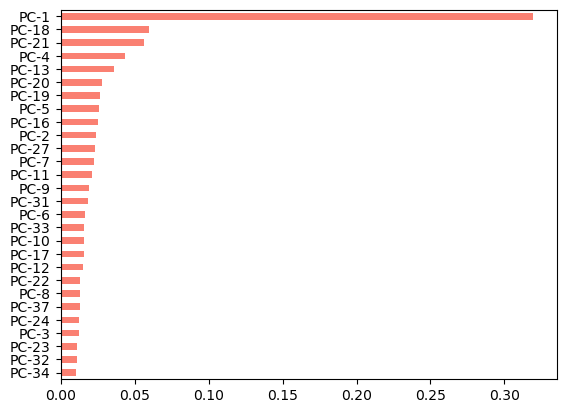

In [ ]:
# Feature Importance
feature_importances = pd.Series(rfCV.best_estimator_.feature_importances_, index=Z_train.columns)
feature_importances.sort_values(ascending=False)
feature_importances.loc[lambda x : x > 0.01].sort_values().plot.barh(color='salmon')

In [ ]:
rfCV.score(Z_test, y_test)

0.726876221988269

In [ ]:
# Run a random forest search on just max_depth 10 to speed up computation time
grid = {"n_estimators": B}
rf = RandomForestClassifier(oob_score=True, max_depth=10, n_jobs=-1)
rfCV2 = GridSearchCV(rf, param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV2.fit(Z_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             return_train_score=True)

In [ ]:
rfCV2.best_params_

{'n_estimators': 60}

In [ ]:
rfCV2.best_score_

0.7315148405318992

In [ ]:
rfCV2.score(Z_test, y_test)

0.7250714393141826

In [ ]:
rfCV2.best_estimator_.oob_score_

0.729051907277547

<Axes: xlabel='trees'>

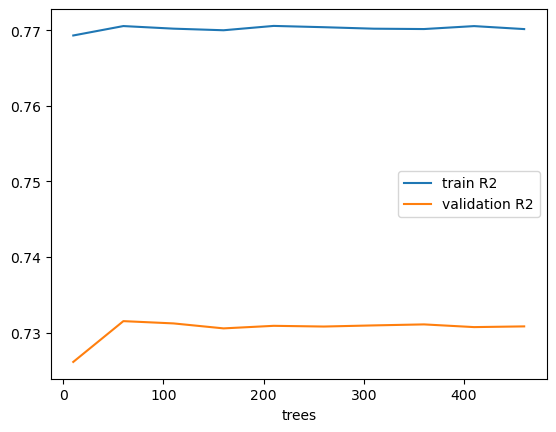

In [ ]:
# Plot results
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV2.cv_results_['mean_train_score']
results['validation R2'] = rfCV2.cv_results_['mean_test_score']

results.plot.line(x='trees', y=['train R2', 'validation R2'])

<Axes: >

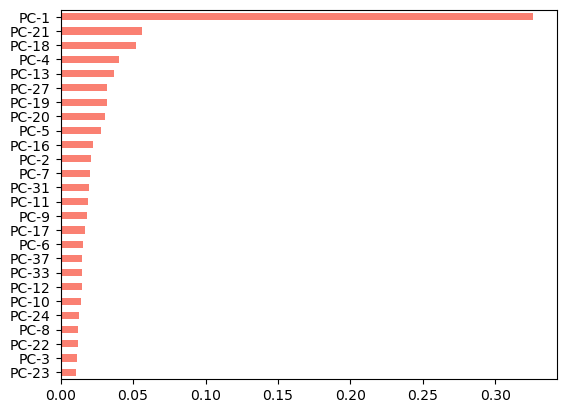

In [ ]:
# Feature Importance
feature_importances = pd.Series(rfCV2.best_estimator_.feature_importances_, index=Z_train.columns)
feature_importances.sort_values(ascending=False)
feature_importances.loc[lambda x : x > 0.01].sort_values().plot.barh(color='salmon')

##### Feature importances stayed relatively the same to first run of the Random Forest to determine best depth. Interestingly enough the n_estimators came out to be a lot lower than normal...

#### 90% Variance Calculations

In [ ]:
# Account for 95% variance
k = 0
total = PVE[k]
while k < len(PVE) and total < 0.90:
    k += 1
    total += PVE[k]

k += 1 # Must add 1 to account for 1-based indexing of PC labels
print('total variance accounted for ', total)

total variance accounted for  0.9037291283281191


In [ ]:
# Make the new features
Z = pca.transform(X)
Z = pd.DataFrame(Z, columns=cols)
Z = Z.iloc[:,0:k]
Z.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26
0,-3.523164,1.649243,-1.338520,1.632289,0.026864,-1.969387,-0.531306,-0.693321,-0.231776,-1.024433,...,-0.720927,-0.069269,-0.639239,-0.244454,0.117640,0.905588,-0.503597,0.127863,0.302219,0.062791
1,5.797893,-2.174916,3.852141,-0.412649,0.578942,-1.902550,-0.520412,-0.680755,-0.817485,0.407580,...,0.109983,0.670678,-0.269753,-0.870684,-2.422453,0.107381,0.568696,-0.064860,0.213836,0.489528
2,-2.506651,0.911924,0.091462,0.097932,-0.239771,-0.280195,-0.308884,-0.539508,-1.334306,2.156053,...,1.542240,0.115646,-0.697170,0.051423,-0.549670,-1.281813,0.352735,0.269968,-0.775262,-0.085118


In [ ]:
# Make new test and train sets from new features
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,train_size=0.8, random_state=0, stratify=y)
Z_train.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26
17802,14.078495,6.979766,3.152355,-0.431298,6.064623,-4.036742,-3.293558,6.383826,2.168672,0.965135,...,1.792945,1.158360,-0.995800,0.786287,-0.093478,0.301472,0.281735,-0.044940,1.055382,-0.255435
26207,-1.873001,2.443667,0.965962,-2.104488,-2.284893,0.170107,-1.216017,0.487403,-0.269283,0.934159,...,-0.041400,-0.075368,0.229017,0.089169,-0.008188,0.610370,0.922505,0.459986,-0.594453,-0.957205
15874,-0.772014,1.465214,-3.640985,-0.353632,-3.771078,-1.247394,-0.144289,0.202811,1.007127,-0.560182,...,-0.161788,-0.052833,-0.325568,-0.371098,-0.025256,0.122251,0.078929,-0.223989,0.383458,0.186346


In [ ]:
# Random Forest Optimization
B = np.arange(10,500,50)
grid = {'n_estimators':B}

rf = RandomForestClassifier(oob_score=True, max_depth=10)
rfCV = GridSearchCV(rf,param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(Z_train, y_train.values.ravel()) # NOTE: .ravel() must be used to avoid an error

GridSearchCV(estimator=RandomForestClassifier(max_depth=10, oob_score=True),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             return_train_score=True)

In [ ]:
rfCV.best_params_

{'n_estimators': 360}

In [ ]:
rfCV.best_score_

0.7310260250779831

In [ ]:
rfCV.score(Z_test, y_test)

0.7271770191006166

In [ ]:
rfCV.best_estimator_.oob_score_

0.7306875223252054

<Axes: xlabel='trees'>

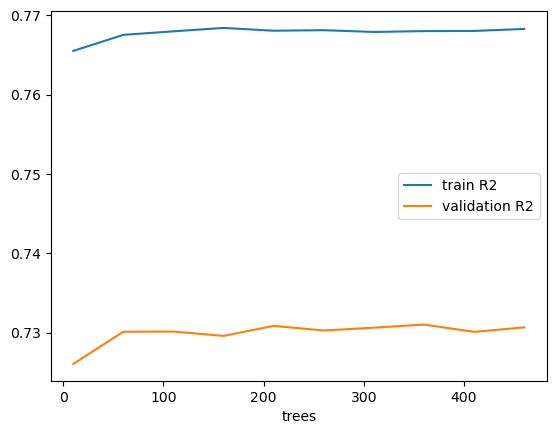

In [ ]:
# Plot results
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['validation R2'] = rfCV.cv_results_['mean_test_score']

results.plot.line(x='trees', y=['train R2', 'validation R2'])

<Axes: >

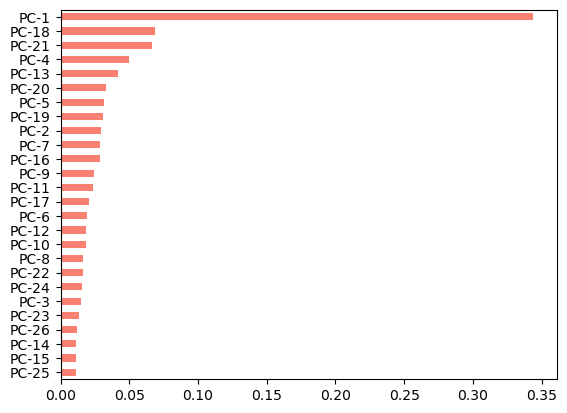

In [ ]:
# Feature Importance
feature_importances = pd.Series(rfCV.best_estimator_.feature_importances_, index=Z_train.columns)
feature_importances.sort_values(ascending=False)
feature_importances.loc[lambda x : x > 0.01].sort_values().plot.barh(color='salmon')

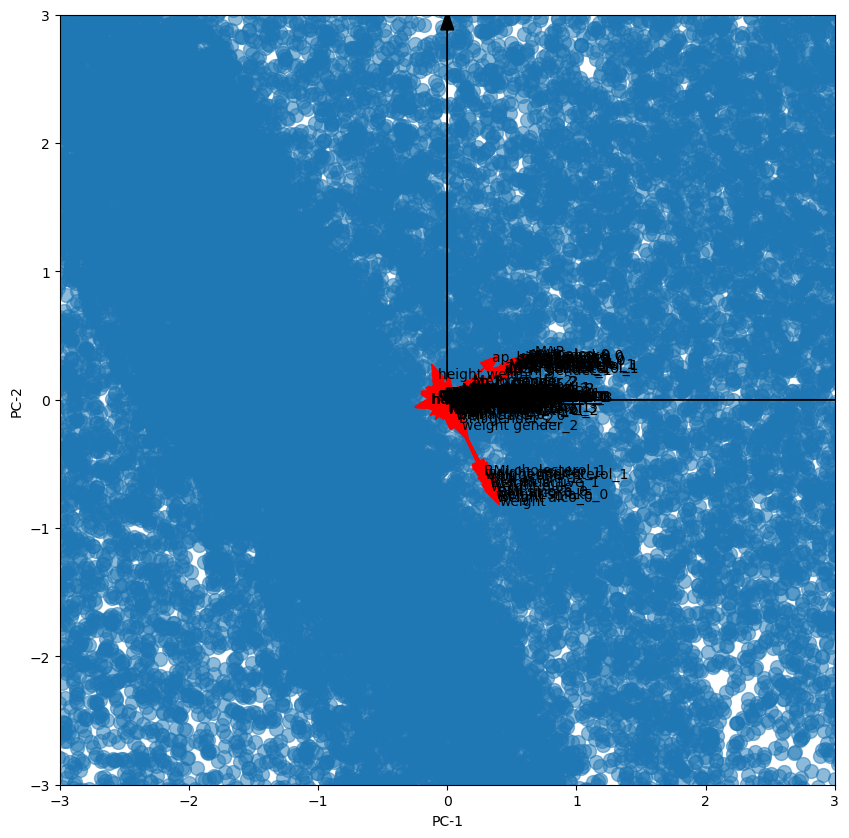

In [ ]:
from datasets.PCA.biplot import biplot

PVE = biplot(X,len(X.columns),1,2,scale=2.5,alpha=0.5,s=100)